<a href="https://colab.research.google.com/github/AnitaZhang0526/APC523S2022FinalProject/blob/main/LAD_Tree_by_Tree_(5_12_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from itertools import accumulate
import random
import time

import shapely.speedups
shapely.speedups.enable()

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 32.2 MB/s 
     |████████████████████████████████| 16.7 MB 324 kB/s 


In [ ]:
ftm = 0.3048

In [ ]:
lcz_sec = "CL2"
# voxel_metrics = np.genfromtxt(r"R Files/R File Outputs/%s_trees_only_buff.csv"%lcz_sec, delimiter=",", 
#                               names = True, dtype = None, usecols=(1, 2, 3, 4) )

voxel_metrics = pd.read_csv(r"%s_trees_only_buff.csv"%lcz_sec)

ttops_all = gpd.read_file("Crowns/%s_tree_crowns_segmented.shp"%lcz_sec)

# ttops = ttops_all
#Isolate one quadrant of ttops
ttops = ttops_all[(ttops_all.XTOP < sum(ttops_all.XTOP) / len(ttops_all.XTOP)) & 
                  (ttops_all.XTOP > min(ttops_all.XTOP)) & (ttops_all.YTOP > min(ttops_all.YTOP)) & 
                  (ttops_all.YTOP < sum(ttops_all.YTOP) / len(ttops_all.YTOP))]






gdf = gpd.GeoDataFrame(voxel_metrics, geometry=gpd.points_from_xy(voxel_metrics.X, voxel_metrics.Y))


In [ ]:

voxel_metrics["LAD"] = np.zeros(len(voxel_metrics))
voxel_metrics["ID"] = np.zeros(len(voxel_metrics))
ttops["LA"] = np.zeros(len(ttops))

voxel_metrics

,Unnamed: 0,X,Y,Z,N,geometry,LAD,ID
0,1,1.030025e+06,188374.34986,0.0,6.0,POINT (1030024.639 188374.350),0.0,0.0
1,2,1.030021e+06,188380.91154,9.0,5.0,POINT (1030021.358 188380.912),0.0,0.0
2,3,1.030021e+06,188380.91154,0.0,3.0,POINT (1030021.358 188380.912),0.0,0.0
3,4,1.030018e+06,188387.47322,11.0,6.0,POINT (1030018.078 188387.473),0.0,0.0
4,5,1.030021e+06,188387.47322,11.0,5.0,POINT (1030021.358 188387.473),0.0,0.0
...,...,...,...,...,...,...,...,...
2005570,2005571,1.032462e+06,192275.26862,3.0,3.0,POINT (1032462.303 192275.269),0.0,0.0
2005571,2005572,1.032472e+06,192291.67282,0.0,7.0,POINT (1032472.146 192291.673),0.0,0.0
2005572,2005573,1.032466e+06,192285.11114,0.0,4.0,POINT (1032465.584 192285.111),0.0,0.0
2005573,2005574,1.032462e+06,192278.54946,0.0,5.0,POINT (1032462.303 192278.549),0.0,0.0


In [ ]:
ttops

,treeID,XTOP,YTOP,ZTOP,Crown Area,geometry,LA
2337,2430,1027540.74,187518.09,40.61,67.706,"POLYGON ((1027549.870 187510.240, 1027543.300 ...",0.0
2338,2429,1027523.57,187520.55,42.60,47.595,"POLYGON ((1027531.900 187522.850, 1027531.880 ...",0.0
2339,5136,1027502.19,187545.37,10.06,0.210,"POLYGON ((1027503.760 187544.630, 1027503.890 ...",0.0
2340,2431,1027652.24,187501.95,31.25,0.049,"POLYGON ((1027653.180 187500.460, 1027652.680 ...",0.0
2341,4550,1027690.71,187505.12,29.74,51.343,"POLYGON ((1027693.730 187510.800, 1027694.430 ...",0.0
...,...,...,...,...,...,...,...
7087,5444,1029349.67,190069.75,9.87,0.180,"POLYGON ((1029349.660 190068.970, 1029349.260 ...",0.0
7090,5452,1029724.28,190021.61,20.07,0.136,"POLYGON ((1029725.970 190020.150, 1029725.510 ...",0.0
7091,6834,1029714.05,190053.43,15.74,0.202,"POLYGON ((1029715.870 190052.070, 1029714.820 ...",0.0
7092,5455,1029708.55,190069.38,15.00,0.107,"POLYGON ((1029709.920 190068.710, 1029708.900 ...",0.0


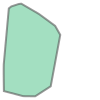

In [ ]:
ttops.loc[2337, 'geometry']#
# ttops.loc[ttops.treeID == 5459, 'geometry']# test['geometry']

# gdf[test]

In [ ]:
z_max = np.zeros(len(ttops))
la_ttops = np.zeros(len(ttops))

print("Number of Tree Crowns: ", len(ttops))

start_time = time.time()

for i, iD in enumerate(ttops["treeID"][:]):
    print(i, iD)

    index = int(list(ttops[ttops.treeID == iD].index)[0])
    # print(index)

    pip_mask = gdf.within(ttops.loc[index, 'geometry'])
#     pip_mask = gdf.within(ttops.loc[ttops.treeID == iD, 'geometry'])

    tree_clip = gdf[pip_mask]  #.clip(s, ttops[ttops["treeID"] == iD])

    voxel_metrics.loc[voxel_metrics['Unnamed: 0'].isin(np.array(tree_clip["Unnamed: 0"])), "ID"] = iD
    
    # print("\t Number of Voxels: " , len(tree_clip))
    if len(tree_clip) <1:
        continue
    
    tree_clip.ID = iD
    
    z_max[i] = np.max(tree_clip.Z)
    
    
    LAI = leaf_area_index(tree_clip, iD, plot = False)
    
    crown_area = ttops[ttops.treeID == iD]["Crown Area"]
#     print(float(crown_area))
    leaf_area = float(LAI * crown_area)
    
#     ttops[ttops.treeID == iD]["LA"] = leaf_area
    la_ttops[i] = leaf_area
#     print(ttops[ttops.treeID == iD])
    
    print("\t Leaf Area", leaf_area)


print(time.time() - start_time, "s")

#--------------------------------------------------------------------
#Save as CSV
column_list = ["X", 	"Y",	"Z",	"N", "LAD", "ID"]
voxel_metrics[column_list].to_csv('%s_LAD.csv'%lcz_sec)  

ttops["LA"] = la_ttops
# ttops["Z"] = ttops["Z"]/ftm

ttops.to_csv('%s_ttops_full.csv'%lcz_sec)



Number of Tree Crowns:  2684
0 2430
	 Leaf Area 158.66909229679953
1 2429
	 Leaf Area 99.53585403044545
2 5136
3 2431
4 4550
	 Leaf Area 125.24324053790872
5 2727
	 Leaf Area 141.35160664092413
6 5085
7 2432
	 Leaf Area 3.3281936971546013
8 4547
	 Leaf Area 73.73686739837703
9 2433
	 Leaf Area 5.340455777833344
10 4787
	 Leaf Area 0.2175252331562857
11 4810
	 Leaf Area 197.47790916295833
12 4535
	 Leaf Area 152.5578762832462
13 4566
	 Leaf Area 116.7855900606434
14 4825
	 Leaf Area 13.554399586157466
15 2434
	 Leaf Area 35.89509449818232
16 2728
	 Leaf Area 94.2868632488283
17 4578
	 Leaf Area 81.66397302043825
18 4579
	 Leaf Area 76.48368847799173
19 5001
	 Leaf Area 49.557567045896796
20 4506
	 Leaf Area 3.24741503674198
21 3886
	 Leaf Area 36.71069496861503
22 4840
	 Leaf Area 153.691869548884
23 2730
	 Leaf Area 176.775204864069
24 4523
	 Leaf Area 31.171281638204228
25 4561
	 Leaf Area 10.544494166808576
26 2731
	 Leaf Area 164.58890254594363
27 2733
	 Leaf Area 221.37539302417204

In [ ]:

#Save as CSV
column_list = ["X", 	"Y",	"Z",	"N", "LAD", "ID"]
voxel_metrics[column_list].to_csv('%s_LAD.csv'%lcz_sec)  

ttops["LA"] = la_ttops
# ttops["Z"] = ttops["Z"]/ftm

ttops.to_csv('%s_ttops_full.csv'%lcz_sec)



In [ ]:
def leaf_area_index(tree_clip, iD, plot = False):
    total_LA = 0
    error = 0

    z_test = np.linspace(0., 70, 151)
    voxel_df = tree_clip.groupby(tree_clip.Z, as_index=False).aggregate({'N': sum}).sort_values(by=['Z'], ascending=False)

    #not enough data/too noisy
    if (len(voxel_df) <=2) or (max(voxel_df.Z)*ftm > 35):   #35 m is too high for realistic tree - may be capturing buildings
        print("    Only ", len(voxel_df), " level(s) or max height of ", max(voxel_df.Z)*ftm)
        lai = 0.
        return lai

    #get cumulative hits at each z level
    n_sum = list(accumulate(voxel_df.N))  #sum previous number of returns on list
    n_sum = np.asarray(n_sum)
#     print("Total hits: ",max(n_sum))
#     print("Total points/z levels: ",len(n_sum))

    #ratio of cumulative points at each z value and total number of hits
    P_gap_total = 1 - (n_sum / (max(n_sum)))    
    P_gap_total[-1] = P_gap_total[-2]  #set ground point equal to closest z value

    L_z_total = -np.log(P_gap_total)
    #print("L_Z_total: ", L_z_total)

    Z_noise = np.unique(voxel_df.Z) + (np.random.uniform(0,1,len(np.unique(voxel_df.Z))) - .5)*.5
    #z_max.append(max(voxel_df.Z))

    #set height and scale weibull parameters, since these are known based on processed LiDAR data
    inst.H = max(voxel_df.Z)*1.0005
    inst.scale = L_z_total[-1]

    bound_down = [random.uniform(0., .1), random.uniform(1., 3.99)]
    bound_up = [random.uniform(.9, 1.), random.uniform(4., 7.)]
    try:
        popt_tree_total, pcov_tree_total = curve_fit(inst.weibull, L_z_total,Z_noise[::-1],  bounds = (bound_down, bound_up),  method = 'dogbox') 
    #p0=[1.2*H_0, .5,10., L_z_total[-1]], bounds=([-1., 0.], [ 2., 10.]), method = 'trf'   bounds=([H_0, -1., 0.], [ 1.5*H_0, 2., 100.]),
    #parameters: (max_height, alpha, beta)
    except RuntimeError:
        try:
            popt_tree_total, pcov_tree_total = curve_fit(inst.weibull, L_z_total,Z_noise[::-1],  bounds = ([0., 1.], [1., 10]), p0 = [.5, 5.5] )# method = 'dogbox') 
        #[random.uniform(bound_down[0], bound_up[0]), random.uniform(bound_down[1], bound_up[1])]
        except RuntimeError:
            popt_tree_total = [.5, 5.] 
            error += 1
            #keep track of number

    except ValueError:
        popt_tree_total = [.5, 5.]
        error += 1


#     print("Total Tree\nH:  %f alpha:  %f   beta: %f   c: %f"%(inst.H, popt_tree_total[0], popt_tree_total[1], inst.scale))

    LAD_values = inst.weibull_pdf(voxel_df.Z, *popt_tree_total)
#     print(LAD_values)


#     print(voxel_metrics[(voxel_metrics.ID == iD)])
    for i, z in enumerate(np.unique(voxel_df.Z)):
        voxel_metrics.LAD[(voxel_metrics.ID == iD) & (voxel_metrics.Z == z)] = float(LAD_values[i])

    if plot == True:
        plotting(voxel_df, z_test, popt_tree_total)

    #LAI
    lai = (inst.weibull(0, *popt_tree_total) - inst.weibull(inst.H, *popt_tree_total))
    
    return lai


def plotting(voxel_df, z_test, popt_tree_total):
    fig= plt.figure( figsize = (20,10))

    #f, ax = plt.subplots(figsize = (12,10))
    #ax.plot(L_z_total, Z_noise[::-1], 'o')
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    ax1.barh(voxel_df.Z, voxel_df.N, color = 'darkgreen')
    ax2.plot(inst.weibull_pdf(voxel_df.Z, *popt_tree_total), voxel_df.Z, '--', label = "PDF Weibull fit L_Z")
    ax2.plot(inst.weibull(z_test, *popt_tree_total), z_test, 'r-', label = "CDF Weibull fit L_Z")
    ax1.set_ylabel("Elevation (m)")
    ax1.set_xlabel("Number of LiDAR hits")
    ax1.set_title("Histogram of LiDAR Hits")
    ax2.set_title("Weibull Fits for Cumulative LAI and LAD")
    #ax1.legend()
    ax2.legend()

    plt.show()
    
    

#use wrap function to avoid global parameters
class fitClass:

    def __init__(self):
        pass

    def weibull(self, z, a, b):

        fit = self.scale - (self.scale * np.exp(-((( 1-(z/self.H) ) / a))**b))
    
        return fit
    
    def weibull_rev(self, a, b):
        fit = .1*inst.scale

        z = -(np.log(1 - (fit/self.scale)))*(-a/b)*self.H + self.H
    
        return z
    
    #derivative of above for pdf
    def weibull_pdf(self, z, a, b):
    
        term_1 = np.exp(-(((1-(z/self.H))/a))**b)
        term_2 = b*(((1-(z/self.H))/a)**b)

        term = self.scale*(abs((term_1 * term_2) / (z-self.H)))

        return term

inst = fitClass()
